## Numerical differentiation

The functions I have defined use the numdifftools package,see https://pypi.python.org/pypi/Numdifftools.  The curl, divergence, and laplacian operators, are not explicitly a part of the package (they probably should be), but the package does return the Jacobian matrix of all first-order partial derivatives of a vector-valued function (https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant), and 
the Hessian matrix of second-order partial derivatives of a scalar-valued function (https://en.wikipedia.org/wiki/Hessian_matrix), from which it is easy to compute the desired operators.

In [1]:
import scipy as sp
import numdifftools as nd  # See https://pypi.python.org/pypi/Numdifftools

import matplotlib as mpl       # As of July 2017 Bucknell computers use v. 2.x 
import matplotlib.pyplot as plt

# Following is an Ipython magic command that puts figures in the  notebook.
# For figures in separate windows, comment out following line and uncomment
# the next line
# Must come before defaults are changed.
%matplotlib notebook
#%matplotlib

# As of Aug. 2017 reverting to 1.x defaults.
# In 2.x text.ustex requires dvipng, texlive-latex-extra, and texlive-fonts-recommended, 
# which don't seem to be universal
# See https://stackoverflow.com/questions/38906356/error-running-matplotlib-in-latex-type1cm?
mpl.style.use('classic')
        
# M.L. modifications of matplotlib defaults using syntax of v.2.0 
# More info at http://matplotlib.org/2.0.0/users/deflt_style_changes.html
# Changes can also be put in matplotlibrc file, or effected using mpl.rcParams[]
plt.rc('figure', figsize = (6, 4.5))            # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True)             # Adjusts supblot parameters for new size

In [2]:
# Divergence of vector-valued function f evaluated at x
def div(f,x):
    jac = nd.Jacobian(f)(x)
    return jac[0,0] + jac[1,1] + jac[2,2]

In [3]:
# Gradient of scalar-valued function f evaluated at x
def grad(f,x):
    return nd.Gradient(f)(x)

In [4]:
# Curl of vector field f evaluated at x
def curl(f,x):
    jac = nd.Jacobian(f)(x)
    return sp.array([jac[2,1]-jac[1,2],jac[0,2]-jac[2,0],jac[1,0]-jac[0,1]])

In [5]:
# Laplacian of scalar field f evaluated at x
def laplacian(f,x):
    hes = nd.Hessdiag(f)(x)
    return sum(hes)

#### Example from documentation
See https://pypi.python.org/pypi/Numdifftools

<IPython.core.display.Javascript object>


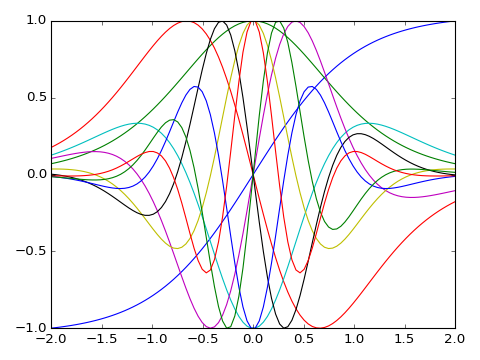

In [6]:
import matplotlib.pyplot as plt
%matplotlib notebook

plt.figure(1)
x = sp.linspace(-2, 2, 100)
for i in range(10):
    df = nd.Derivative(sp.tanh, n=i)
    y = df(x)
    h = plt.plot(x, y/sp.absolute(y).max())

#### Scalar function single variable: $\quad f(x) = 4x^3\quad\left.\frac{df}{dx}\right|_{x_0}\quad\left.\frac{d^2f}{dx^2}\right|_{x_0}$

In [7]:
def f(x):
    return 4*x**3

In [8]:
x0 = 3
d1 = nd.Derivative(f,n=1)  # OR nd.Derivative(f)
d2 = nd.Derivative(f,n=2)
d1(x0),d2(x0)

(array(108.00000000000003), array(72.00000000000017))

#### Scalar field (3D): $\quad g({\bf r}) = x^2 + y^3 + 1\left.\quad\nabla g\right|_{{\bf r}_0}\quad \left.\nabla^2g\right|_{{\bf r}_0}$

In [9]:
def g(x):
    return x[0]**2+x[1]**3+1

In [10]:
r0 = sp.array([1,2,3])
grad(g,r0)

array([  2.,  12.,   0.])

In [11]:
laplacian(g,r0)

14.000000000000021

#### Vector  field  (3D): $\quad {\bf v}({\bf r})\quad\nabla\cdot {\bf v}\quad \nabla\times{\bf v}$

In [12]:
def v1(x):
    return sp.array([x[1]**3,x[0]**2,x[0]])

def v2(x):
    return sp.array([x[0]**3*x[2],x[1],x[2]*x[1]])

In [13]:
r0 = sp.array([1,2,3])

In [14]:
curl(v1,r0)

array([ 0., -1., -10.])

In [15]:
div(v1,r0), div(v2,r0)

(0.0, 12.0)

### Version Information 
`version_information` is from J.R. Johansson (jrjohansson at gmail.com)<br>
See Introduction to scientific computing with Python:<br>
http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb <br>
for more information and instructions for package installation.<br>

If `version_information` has been installed system wide (as it has been on Bucknell linux computers with shared file systems), continue with next cell as written.  If not, comment out top line in next cell and uncomment the second line.

In [16]:
%load_ext version_information

#%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py

Loading extensions from ~/.ipython/extensions is deprecated. We recommend managing extensions like any other Python packages, in site-packages.


In [17]:
version_information scipy, matplotlib, numdifftools

Software versions
Python 3.6.1 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 6.1.0
OS Linux 3.10.0 327.36.3.el7.x86_64 x86_64 with redhat 7.2 Maipo
scipy 0.19.1
matplotlib 2.0.2
numdifftools 0.9.20
Tue Aug 01 12:25:30 2017 EDT